> Recurrent neural networks (RNNs), a class of nets that can
predict the future

# Recurrent Neurons and Layers

A recurrent neural network looks very much like a feedforward neural network, except it also has connections pointing backward

Let’s look at the simplest possible RNN, composed of one neuron receiving **inputs,** producing an **output**, and sending that **output back to itself,** as shown in Figure 15-1 (left)

At each time step t (also called a frame), this recurrent neuron **receives** the inputs **$x_{(t)}$** as well as its own **output** from the **previous time step, $y_{t-1}$**. At each time step t (also called a frame), this recurrent neuron receives the inputs

We can represent this tiny network against the time axis, as shown in Figure 15-1 (right). This is called **unrolling the network through time**

<p align='center'>
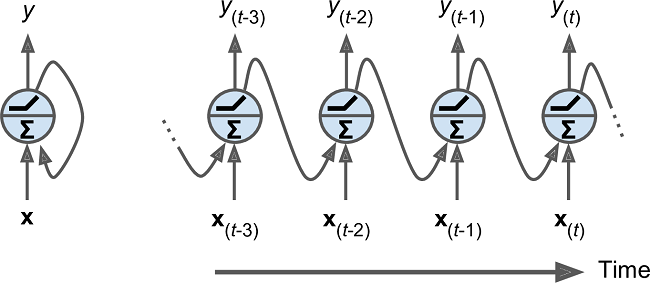
</p>
Figure 15-1. A recurrent neuron (left) unrolled through time (right)

At each time step t, **every neuron receives both the input vector $x_{(t)}$ and the output vector from the previous time step $y_{t-1}$,** as shown in Figure 15-2

Note that both the inputs and outputs are vectors now (when there was just a single neuron, the output was a scalar)

<p align='center'>
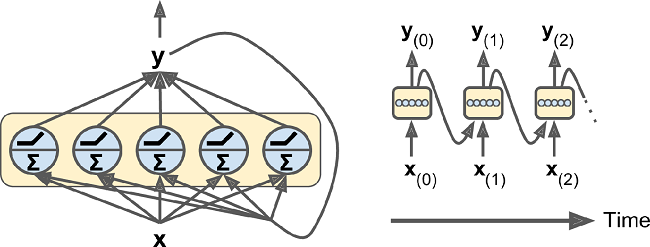
</p>
Figure 15-2. A layer of recurrent neurons (left) unrolled through time (right)

**Each recurrent neuron has two sets of weights:** one for the **inputs $x_{(t)}$** and the other for the **outputs of the previous time step, $y_{(t-1)}$**. Let’s call these weight vectors $w_x$ and $w_y$

If we consider the **whole recurrent layer** instead of just one recurrent neuron, we can place all the **weight vectors in two weight matrices, $W_x$ and $W_y$**

The output vector of the whole recurrent layer can then be computed pretty much as you might expect, as shown in Equation 15-1 (b is the bias vector and $Φ(.)$ is the activation function)

Equation 15-1. Output of a recurrent layer for a single instance

$$y_{(t)} = \phi({W_x}^T x_{(t)} + {W_y}^T y_{(t-1)} + b) $$

Just as with feedforward neural networks, we can compute a recurrent layer’s output in one shot for a whole **mini-batch** by placing all the inputs at time step t in an input matrix $X_{(t)}$ (see Equation 15-2)

Equation 15-2. Outputs of a layer of recurrent neurons for all instances in a mini-batch
<p align='center'>
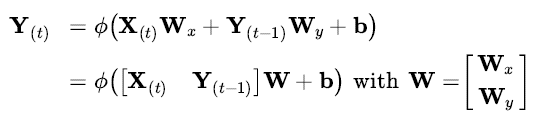
</p>

In this equation:

* $Y_{(t)}$ is an **$m \times n_{\text{neurons}}$ matrix** containing the layer's outputs at time step t for each instance in the **mini-batch** (m is the number of instances in the mini-batch and $n_{\text{neurons}}$ is the number of neurons)

* $X_{(t)}$ is an $m \times n_{\text{inputs}}$ matrix containing the **inputs for all instances** ($n_{\text{inputs}}$ is the number of input features)

* $W_x$ is an $n_{\text{inputs}} \times n_{\text{neurons}}$ matrix containing the **connection weights for the inputs of the current time step**

* $W_y$ is an $n_{\text{neurons}} \times n_{\text{neurons}}$ matrix containing the **connection weights for the outputs of the previous time step**

* $b$ is a vector of size $n_{\text{neurons}} containing **each neuron's bias term**

* The weight matrices **$W_x$ and $W_y$** are often concatenated vertically into a **single weight matrix W** of shape $(n_{\text{inputs}} + n_{\text{neurons}}) \times n_{\text{neurons}}$ (see the second line of Equation 15-2)

* The notation $[X_{(t)} Y_{(t-1)}]$ represents the horizontal concatenation of the matrices 

Notice that $Y_{(t)}$ is a function of $X_{(t)}$ and $Y_{(t-1)}$, which is a function of $X_{(t-1)}$ and $Y_{(t-2)}$, which is a function of $X_{(t-2)}$ and $Y_{(t-3)}$, and so on

This makes $Y_{(t)}$ a function of all the inputs since time t = 0 (that is, $X_{(0)}, X_{(1)}, \dots, X_{(t)}$

At the first time step, t = 0, there are no previous outpus, so they are typically assumed to be all zeros

## Memory Cells

**Since the output of a recurrent neuron at time step t is a function of all the inputs from previous time steps, you could say it has a form of memory**

A **part** of a neural network that **preserves some state across time steps** is called a **memory cell** (or simply a cell). A **single recurrent neuron,** or a layer of recurrent neurons, **is a very basic cell,** capable of learning only **short patterns** (typically about 10 steps long)

In general a cell’s state at time step t, denoted **$h_{(t)}$** (the "h" stands for "hidden"), is a **function of some inputs at that time step and its state at the previous time step:** $h_{(t)} = f(h_{(t-1)}, x_{(t)})$

Its output at time step t, denoted $y_{(t)}$, is also a function of the previous state and the current inputs. In the case of the basic cells we have discussed so far, the output is simply equal to the state, but in more complex cells this is not always the case, as shown in Figure 15-3 

<p align='center'>
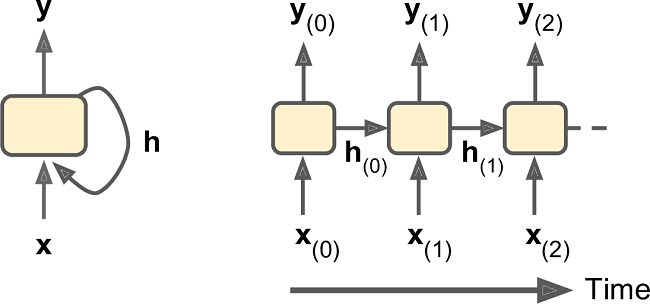
</p>
Figure 15-3. A cell’s hidden state and its output may be different

## Input and Output Sequences

An RNN can **simultaneously take a sequence of inputs and produce a sequence of outputs** (see the top-left network in Figure 15-4)

This type of **sequence-to-sequence network** is useful for **predicting time series** such as stock prices: you feed it the prices over the last N days, and it must output the prices shifted by one day into the future (i.e., from N – 1 days ago to tomorrow)

Alternatively, you could feed the network a sequence of inputs and **ignore all outputs except for the last one** (see the top-right network in Figure 15- 4). In other words, this is a **sequence-to-vector network**

For example, you could feed the network a sequence of words corresponding to a movie review, and the network would output a sentiment score (e.g., from –1 [hate] to +1 [love])

Conversely, you could **feed the network the same input vector over and over again at each time step** and let it **output a sequence** (see the bottom left network of Figure 15-4). This is a **vector-to-sequence network**. For example, the input could be an image (or the output of a CNN), and the output could be a caption for that image

Lastly, you could have a **sequence-to-vector network, called an encoder, followed by** a **vector-to-sequence network, called a decoder** (see the bottom-right network of Figure 15-4)

For example, this could be used for translating a sentence from one language to another. You would feed the network a sentence in one language, the encoder would convert this sentence into a single vector representation, and then the decoder would decode this vector into a sentence in another language

This two-step model, called an **Encoder–Decoder,** works much better than trying to translate **on the fly** with a single sequence-to-sequence RNN (like the one represented at the top left): the last words of a sentence can affect the first words of the translation, so you need to wait until you have seen the whole sentence before translating it

<p align='center'>
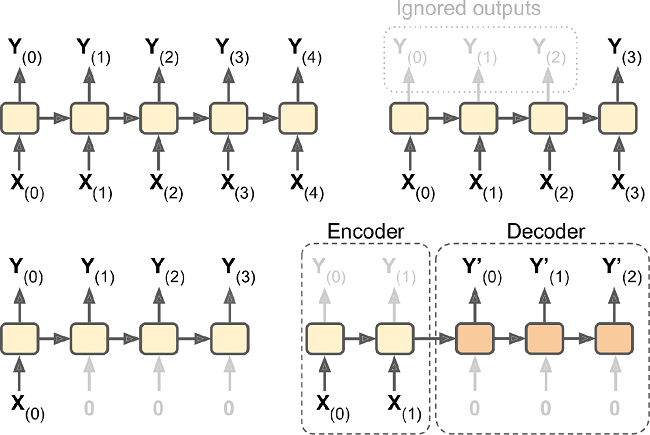
</p>
Figure 15-4. Seq-to-seq (top left), seq-to-vector (top right), vector-to-seq (bottom left), and Encoder–Decoder (bottom right) networks

# Training RNNs

To train an RNN, the trick is **to unroll it through time** and then simply use **regular backpropagation** (see Figure 15-5). This strategy is called **backpropagation through time (BPTT)**

Just like in regular backpropagation, there is a first forward pass through the unrolled network (represented by the dashed arrows). Then the output sequence is evaluated using a cost function $C(Y_{(0)}, Y_{(1)}, \dots Y_{(T)})$ where T is the max time step

Note that this cost function may ignore some outputs, as shown in Figure 15-5 (for example, in a sequence-to-vector RNN, all outputs are ignored except for the very last one). The gradients of that cost function are then propagated backward through the unrolled network (represented by the solid arrows)

Finally the model parameters are updated using the gradients computed during BPTT. Note that the **gradients flow backward through all the outputs used by the cost function,** not just through the final output

For example, in Figure 15-5 the cost function is computed using the last three outputs of the network, $Y_{(2)}, Y_{(3)}, \text{and } Y_{(4)}$, so gradients flow through these three outputs, but not through $Y_{(0)} \text{and } Y_{(1)}$

Moreover, since the same parameters $W$ and $b$ are used at each time step, backpropgation will do the right thing and sum over all time steps

<p align='center'>
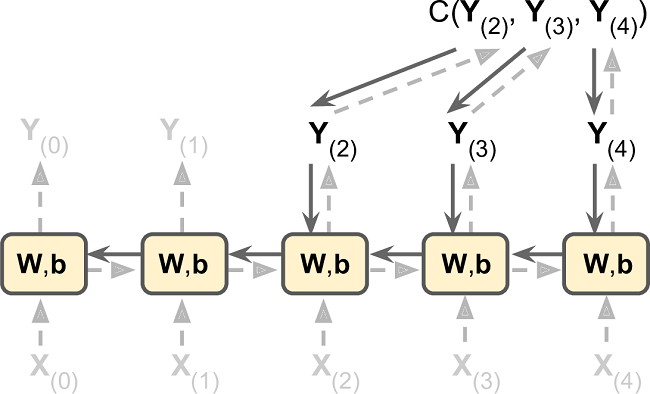
</p>
Figure 15-5. Backpropagation through time

# Forecasting a Time Series

Suppose you are studying the number of active users per hour on your website, or the daily temperature in your city, or your company’s financial health, measured quarterly using multiple metrics. In all these cases, the data will be a sequence of **one or more values per time step.** This is called a **time series**

In the first two examples there is a **single value per time step,** so these are **univariate time series,** while in the financial example there are **multiple values per time step** (e.g., the company’s revenue, debt, and so on), so it is a **multivariate time series**

A typical task is to predict future values, which is called **forecasting.** Another common task is to fill in the blanks: to predict (or rather “postdict”) missing values from the past. This is called **imputation**

For example, Figure 15-6 shows 3 univariate time series, each of them 50 time steps long, and the goal here is to forecast the value at the next time step (represented by the X) for each of them

<p align='center'>
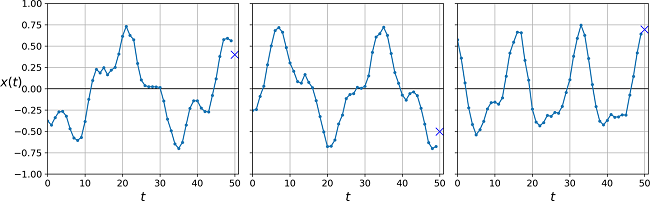
</p>
Figure 15-6. Time series forecasting

For simplicity, we are using a time series generated by the generate_time_series() function, shown here: 

In [1]:
import numpy as np
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

This function creates as many time series as requested (via the batch_size argument), each of length n_steps, and there is just one value per time step in each series (all series are univariate)

The function returns a NumPy array of shape [batch size, time steps, 1], where each series is the sum of two sine waves of fixed amplitudes but random frequencies and phases, plus a bit of noise

When dealing with time series (and other types of sequences such as sentences), the input features are generally represented as 3D arrays of shape **[batch size, time steps, dimensionality],** where dimensionality is 1 for univariate time series and more for multivariate time series.

Now let’s create a training set, a validation set, and a test set using this function:

In [2]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

X_train contains 7,000 time series (i.e., its shape is [7000, 50, 1]), while X_valid contains 2,000 (from the 7,000th time series to the 8,999th) and X_test contains 1,000 (from the 9,000th to the 9,999th)

Since we want to forecast a single value for each series, the targets are column vectors (e.g., y_train has a shape of [7000, 1])

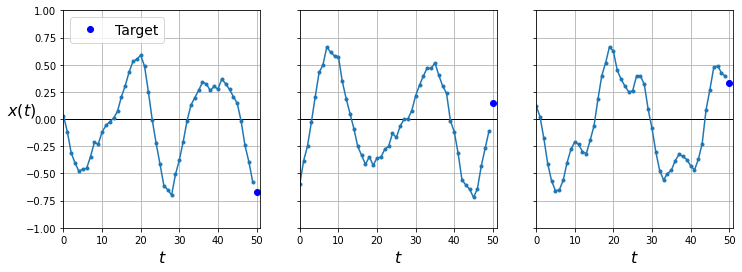

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

## Baseline Metrics

The simplest approach is to **predict the last value in each series.** This is called **naive forecasting,** and it is sometimes surprisingly difficult to outperform. In this case, it gives us a mean squared error of about 0.020:

In [4]:
import tensorflow as tf
from tensorflow import keras

y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.022139065

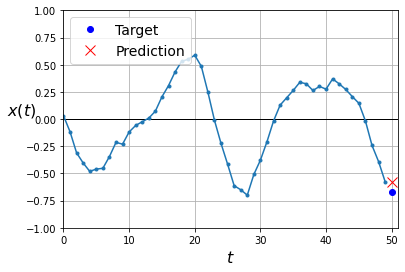

In [5]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])

Another simple approach is to use a **fully connected network.** Since it **expects a flat list of features for each input,** we need to add a **Flatten layer.** Let’s just use a simple Linear Regression model so that each prediction will be a linear combination of the values in the time series:

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.1208 - val_loss: 0.0402
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0257 - val_loss: 0.0180
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.0112
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0084
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0071
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0050

In [7]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 1ms/step - loss: 0.0038


0.0038326887879520655

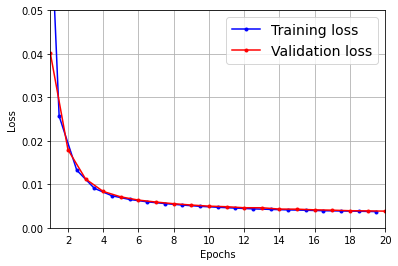

In [8]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])

## Implementing a Simple RNN

Let’s see if we can beat that with a simple RNN:

In [9]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='mse', optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 3s 9ms/step - loss: 0.0977 - val_loss: 0.0500
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0371 - val_loss: 0.0311
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0253 - val_loss: 0.0232
Epoch 4/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0197 - val_loss: 0.0190
Epoch 5/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0166 - val_loss: 0.0162
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0145 - val_loss: 0.0145
Epoch 7/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0132 - val_loss: 0.0134
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0124 - val_loss: 0.0127
Epoch 9/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0119 - val_loss: 0.0122
Epoch 10/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0116 - val_loss: 0.0120

In [10]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 3ms/step - loss: 0.0119


0.011875854805111885

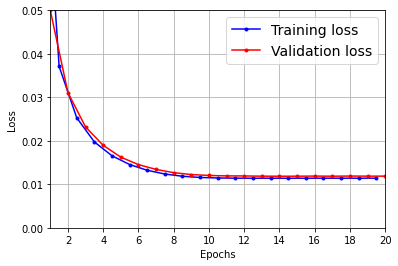

In [11]:
plot_learning_curves(history.history['loss'], history.history['val_loss'])

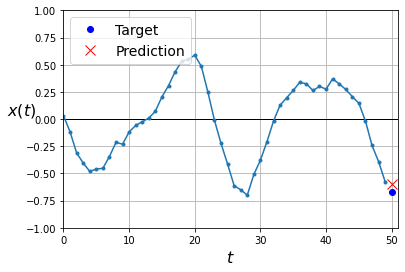

In [12]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])

> By default, recurrent layers in Keras only return the final output. To make them return one output per time step, you must set return_sequences=True, as we will see.

That’s really the simplest RNN you can build. It just contains a single layer, with a single neuron, as we saw in Figure 15-1

We **do not need to specify the length of the input sequences** (unlike in the previous model), since a **recurrent neural network can process any number of time steps** (this is why we set the first input dimension to None)

By default, the **SimpleRNN layer** uses the **hyperbolic tangent activation function.** It works exactly as we saw earlier: the initial state $h_{(\text{init})}$ is set to 0, and it is passed to a single recurrent neuron, along with the value of the first time step, $x_{(0)}$

The neuron computes a weighted sum of these values and applies the hyperbolic tangent activation function to the result, and this gives the first output, $y_0$. In a simple RNN, this output is also the new state **$h_0$**

This **new state** is passed to the same recurrent neuron **along with the next input value, $x_{(1)}$,** and the process is repeated until the last time step. Then the layer just outputs the last value, $y_{(49)}$. All of this is performed simultaneously for every time series


If you compile, fit, and evaluate this model (just like earlier, we train for 20 epochs using Adam), you will find that its MSE reaches only 0.014, so it is better than the naive approach but it does not beat a simple linear model

Note that for each neuron, **a linear model has one parameter per input and per time step, plus a bias term** (in the simple linear model we used, that’s a total of **51 parameters**). In contrast, for each recurrent neuron in a simple RNN, there is just one parameter per input and per hidden state dimension (in a **simple RNN,** that’s just the number of recurrent neurons in the layer), plus a bias term. In this simple RNN, that’s a total of just **three parameters**

## Deep RNNs

It is quite common to stack multiple layers of cells, as shown in Figure 15-7. This give you a **deep RNN**

<p align='center'>
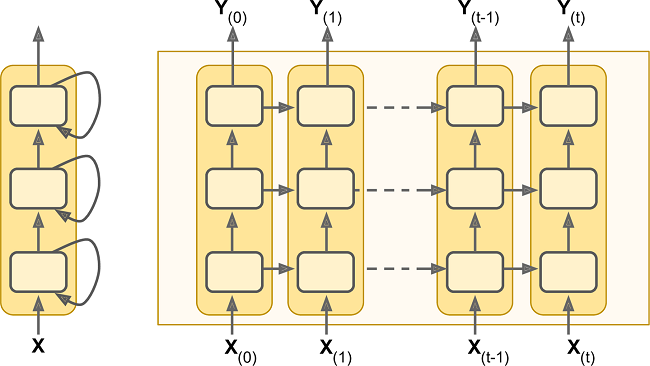
</p>
Figure 15-7. Deep RNN (left) unrolled through time (right)

Implementing a deep RNN with tf.keras is quite simple: just stack recurrent layers. In this example, we use three SimpleRNN layers

In [13]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 8s 30ms/step - loss: 0.0190 - val_loss: 0.0049
Epoch 2/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 3/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 4/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 5/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 6/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 7/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 8/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0028 - val_loss: 0.0033
Epoch 9/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0028 - val_loss: 0.0033
Epoch 10/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0027 - val_lo

In [14]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 1s 8ms/step - loss: 0.0027


0.002716147108003497

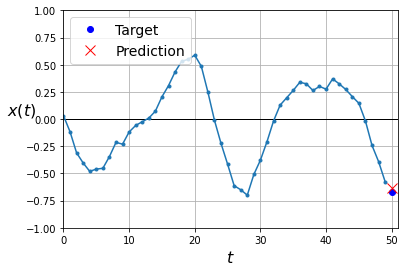

In [15]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])

If you compile, fit, and evaluate this model, you will find that it reaches an MSE of 0.003

Note that the **last layer is not ideal:** it must have a **single unit** because we want to forecast a **univariate time series,** and this means we must have a **single output value per time step**

However, having a single unit means that the hidden state is just a single number. That’s really not much, and it’s probably not that useful; presumably, the RNN will mostly use the hidden states of the other recurrent layers to carry over all the information it needs from time step to time step, and it will not use the final layer’ hidden state very much

Moreover, since a SimpleRNN layer uses the tanh activation function by default, the predicted values must lie within the range –1 to 1. But what if you want to use **another activation function?** For both these reasons, it might be preferable to **replace the output layer** with a **Dense layer:** it would run slightly **faster,** the **accuracy** would be roughly the **same,** and it would allow us to **choose** any output **activation function** we want

If you make this change, also make sure to remove return_sequences=True from the second (now last) recurrent layer:


In [16]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)                               
])

model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 6s 21ms/step - loss: 0.0354 - val_loss: 0.0090
Epoch 2/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 3/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 4/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 5/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 6/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 7/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 8/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 9/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 10/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0028 - val_lo

In [17]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 7ms/step - loss: 0.0029


0.0029306963551789522

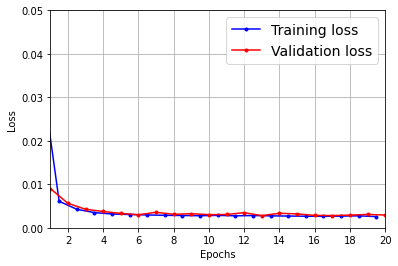

In [18]:
plot_learning_curves(history.history['loss'], history.history['val_loss'])

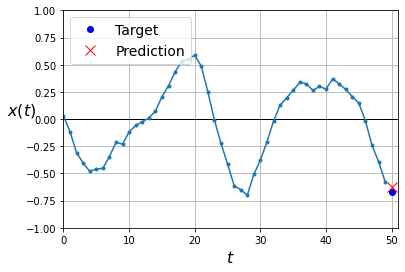

In [19]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])

If you train this model, you will see that it **converges faster and performs just as well.** Plus, you could change the output activation function if you wanted

## Forecasting Several Time Steps Ahead

So far we have only predicted the value at the next time step, but we could just as easily have predicted the value several steps ahead by changing the targets appropriately (e.g., to predict 10 steps ahead, just change the targets to be the value 10 steps ahead instead of 1 step ahead). But what if we want to **predict the next 10 values?**

The first option is to use the model we already trained, make it predict the next value, then **add that value to the inputs** (acting as if this predicted value had actually occurred), and use the model again to predict the following value, and so on, as in the following code:

In [20]:
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
  y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
  X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

In [21]:
Y_pred.shape

(1, 10, 1)

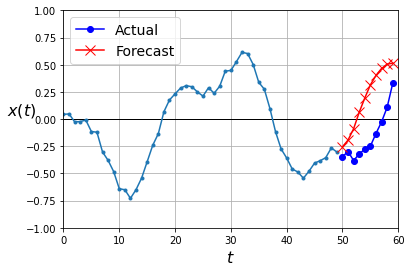

In [22]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)

Figure 15-8. Forecasting 10 steps ahead, 1 step at a time

The second option is to **train an RNN to predict all 10 next values at once.** We can still use a sequence-to-vector model, but it will output 10 values instead of 1. However, we first need to **change the targets to be vectors containing the next 10 values:**

In [23]:
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

Now we just need the output layer to have 10 units instead of 1:

In [24]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 6s 22ms/step - loss: 0.0684 - val_loss: 0.0262
Epoch 2/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0231 - val_loss: 0.0180
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0164 - val_loss: 0.0144
Epoch 4/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0139 - val_loss: 0.0151
Epoch 5/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0125 - val_loss: 0.0126
Epoch 6/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0122 - val_loss: 0.0129
Epoch 7/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0110 - val_loss: 0.0106
Epoch 8/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0107 - val_loss: 0.0104
Epoch 9/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0104 - val_loss: 0.0095
Epoch 10/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0102 - val_lo

After training this model, you can predict the next 10 values at once very easily:

In [25]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

In [26]:
Y_pred.shape

(1, 10, 1)

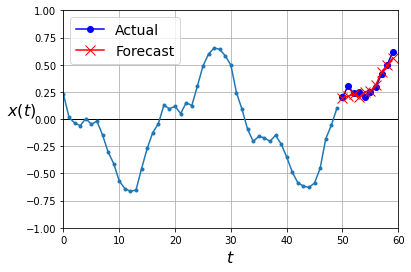

In [27]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)

This model works nicely: the MSE for the next 10 time steps is about 0.008. That’s much better than the linear model. But we can still do better: indeed, instead of training the model to forecast the next 10 values only at the very last time step, we can train it to **forecast the next 10 values at each and every time step**

In other words, we can turn this sequence-to vector RNN into a **sequence-to-sequence RNN.** The **advantage** of this technique is that **the loss will contain a term for the output of the RNN at each and every time step,** not just the output at the last time step

This means there will be many **more error gradients flowing through the model,** and they won’t have to flow only through time; they will also **flow from the output of each time step.** This will both **stabilize and speed up training**

To be clear, at **time step 0** the model will output a vector containing the **forecasts for time steps 1 to 10,** then at **time step 1** the model will **forecast time steps 2 to 11,** and so on

So each target must be a sequence of the same length as the input sequence, containing a 10-dimensional vector at each step. Let’s prepare these target sequences:

In [28]:
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [29]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

To turn the model into a **sequence-to-sequence model,** we must set **return_sequences=True** in all recurrent layers (even the last one), and  we must **apply the output Dense layer at every time step**

Keras offers a **TimeDistributed** layer for this very purpose: **it wraps any layer** (e.g., a Dense layer) and **applies it at every time step** of its input sequence

It does this efficiently, by **reshaping the inputs** so that **each time step is treated as a separate instance** (i.e., it reshapes the inputs **from [batch size, time steps, input dimensions] to [batch x size time steps, input dimensions];** 

In this example, the **number of input dimensions is 20 because the previous SimpleRNN layer has 20 units),** then it runs the Dense layer, and finally it **reshapes the outputs back to sequences** (i.e., it reshapes the outputs from
[batch size × time steps, output dimensions] to [batch size, time steps, output dimensions];

In this example the number of **output dimensions is 10,** since the **layer has 10 units).** Here is the updated model: Dense


In [30]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

**The Dense layer actually supports sequences as inputs** (and even higher dimensional inputs): **it handles them just like TimeDistributed(Dense(...)),** meaning it is applied to the last input dimension only (independently across all time steps). **Thus, we could replace the last layer with just Dense(10)**

For the sake of clarity, however, we will keep using TimeDistributed(Dense(10) because it makes it clear that the Dense layer is applied independently at each time step and that the model will output a sequence, not just a single vector

All outputs are needed during training, but **only the output at the last time step is useful for predictions and for evaluation.** So although we will rely on the MSE over all the outputs for training, we will use a custom metric for evaluation, to **only compute the MSE over the output at the last time step:**

In [31]:
def last_time_step_mse(Y_true, Y_pred):
  return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 6s 22ms/step - loss: 0.0488 - last_time_step_mse: 0.0392 - val_loss: 0.0392 - val_last_time_step_mse: 0.0314
Epoch 2/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0330 - last_time_step_mse: 0.0216 - val_loss: 0.0293 - val_last_time_step_mse: 0.0167
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0287 - last_time_step_mse: 0.0169 - val_loss: 0.0270 - val_last_time_step_mse: 0.0144
Epoch 4/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0254 - last_time_step_mse: 0.0134 - val_loss: 0.0249 - val_last_time_step_mse: 0.0137
Epoch 5/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0231 - last_time_step_mse: 0.0109 - val_loss: 0.0245 - val_last_time_step_mse: 0.0106
Epoch 6/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0219 - last_time_step_mse: 0.0096 - val_loss: 0.0214 - val_last_time_step_mse: 0.0088
Epoch 7/20
219/219 [==

In [32]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

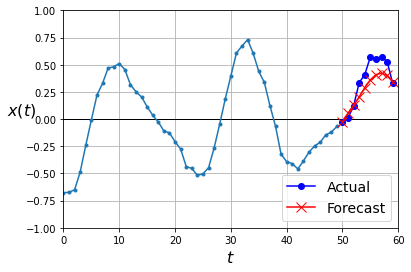

In [33]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)

We get a validation MSE of about 0.006, which is 25% better than the previous model

You can combine this approach with the first one: just predict the next 10 values using this RNN, then concatenate these values to the input time series and use the model again to predict the next 10 values, and repeat the process as many times as needed

# Handling Long Sequences

To train an RNN on long sequences, we must run it over many time steps, making the unrolled RNN a very deep network

Just like any deep neural network it may suffer from the **unstable gradients problem,** it may take forever to train, or training may be unstable

Moreover, **when an RNN processes a long sequence, it will gradually forget the first inputs** in the sequence

## Fighting the Unstable Gradients Problem

Many of the tricks we used in deep nets to alleviate the unstable gradients problem **can also be used for RNNs:** good parameter initialization, faster **optimizers, dropout,** and so on

However, **nonsaturating activation functions** (e.g., ReLU) **may not help as much here;** in fact, they may actually lead the RNN to be even more unstable during training

Why? Well, **suppose Gradient Descent updates the weights in a way that increases the outputs slightly at the first time step.** Because the **same weights are used at every time step,** the **outputs at the second time step may also be slightly increased,** and those at the third, **and so on** until the **outputs explode** —and a nonsaturating activation function does not prevent that

You can reduce this risk by using a smaller learning rate, but you can also simply use a saturating activation function like the hyperbolic tangent (this explains why it is the default). In much the same way, **the gradients themselves can explode.** If you notice that training is unstable, you may want to monitor the size of the gradients (e.g., using TensorBoard) and perhaps use Gradient Clipping

Moreover, **Batch Normalization** cannot be used as efficiently with RNNs as with deep feedforward nets. In fact, you **cannot use it between time steps, only between recurrent layers.** To be more precise, it is technically **possible to add a BN layer to a memory cell** (as we will see shortly) so that it will be applied at each time step (both on the inputs for that time step and on the hidden state from the previous step)

However, the **same BN layer** will be used at each time step, with the **same parameters,** regardless of the actual scale and offset of the inputs and hidden state. In practice, **this does not yield good results,** as was demonstrated by Cesar Laurent et al. in a [2015 paper](https://arxiv.org/abs/1510.01378)

The authors found that BN was slightly beneficial only when it was applied to the inputs, not to the hidden states. In other words, it was **slightly better than nothing when applied between recurrent layers** (i.e., vertically in Figure 15-7), but not within recurrent layers (i.e., horizontally)

Another form of normalization often works better with RNNs: **Layer Normalization.** This idea was introduced by Jimmy Lei Ba et al. in a [2016 paper](https://arxiv.org/abs/1607.06450): it is very similar to Batch Normalization, but instead of normalizing across the batch dimension**, it normalizes across the features dimension**

One advantage is that it can **compute the required statistics on the fly, at each time step, independently for each instance.** This also means that it **behaves the same way during training and testing** (as opposed to BN), and it does not need to use exponential moving averages to estimate the feature statistics across all instances in the training set. Like BN, Layer Normalization learns a scale and an offset parameter for each input. **In an RNN, it is typically used right after the linear combination of the inputs and the hidden states**



Let’s use tf.keras to implement Layer Normalization within a simple memory cell. For this, we need to define a custom memory cell. It is just like a regular layer, except its call() method takes two arguments: the inputs at hte current time step and the hidden states from the previous time step

Note that the **states argument** is a **list containing one or more tensors.** In the case of a **simple RNN cell** it **contains a single tensor equal to the outputs of the previous time step,** but other cells may have multiple state tensors (e.g., an LSTMCell has a long-term state and a short term state)

A cell must also have a **state_size attribute** and an **output_size attribute.** In a simple RNN, both are simply equal to the number of units. The following code implements a custom memory cell which will behave like a SimpleRNNCell, except it will also apply Layer Normalization at each time step:

In [34]:
from tensorflow.keras.layers import LayerNormalization

In [35]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units,
                                                          activation=None)
        self.layer_norm = LayerNormalization()
        self.activation = keras.activations.get(activation)
    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if inputs is not None:
            batch_size = tf.shape(inputs)[0]
            dtype = inputs.dtype
        return [tf.zeros([batch_size, self.state_size], dtype=dtype)]
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

Our LNSimpleRNNCell class inherits from the keras.layers.Layer class, just like any custom layer 

The constructor takes the number of units and the desired activation function, and it sets the state_size and output_size attributes, then creates a SimpleRNNCell with no activation function (because we want to perform **Layer Normalization after the linear operation** but **before the activation function)**

Then the constructor creates the LayerNormalization layer, and finally it fetches the desired activation function

The **call() method starts by applying the simple RNN cell,** which **computes a linear combination of the current inputs and the previous hidden states,** and it returns the result twice (indeed, in a SimpleRNNCell, the outputs are just equal to the hidden states: in other words, new_states[0] us equal to outpus, so we can safely ignore new_states in the rest of the call() method)

Next, the call() method applies Layer Normalization, followed by the activation function. Finally, it returns the outputs twice (once as the outputs, and once as the new hidden states)

To use this custom cell, all we need to do is create a keras.layers.RNN layer, passing it a cell instance:

In [ ]:
model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
                     input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss='mse', optimizer='adam', metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                      validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 13s 47ms/step - loss: 0.1611 - last_time_step_mse: 0.1557 - val_loss: 0.0689 - val_last_time_step_mse: 0.0535
Epoch 2/20
219/219 [==============================] - 10s 44ms/step - loss: 0.0599 - last_time_step_mse: 0.0470 - val_loss: 0.0565 - val_last_time_step_mse: 0.0443
Epoch 3/20
219/219 [==============================] - 10s 45ms/step - loss: 0.0515 - last_time_step_mse: 0.0384 - val_loss: 0.0496 - val_last_time_step_mse: 0.0360
Epoch 4/20
219/219 [==============================] - 10s 45ms/step - loss: 0.0461 - last_time_step_mse: 0.0327 - val_loss: 0.0451 - val_last_time_step_mse: 0.0301
Epoch 5/20
219/219 [==============================] - 10s 45ms/step - loss: 0.0425 - last_time_step_mse: 0.0285 - val_loss: 0.0420 - val_last_time_step_mse: 0.0269
Epoch 6/20
219/219 [==============================] - 10s 45ms/step - loss: 0.0400 - last_time_step_mse: 0.0255 - val_loss: 0.0399 - val_last_time_step_mse: 0.0257
Epoch 7/20
219/2

Similarly, you could create a custom cell to apply dropout between each time step. But there’s a simpler way: **all recurrent layers** (except for keras.layers.RNN) and all cells provided by Keras have a **dropout hyperparameter** and a **recurrent_dropout hyperparameter:**

The **former** defines the **dropout rate to apply to the inputs (at each time step),** and the **latter defines the dropout rate for the hidden states** (also at each time step). No need to create a custom cell to apply dropout at each time step in an RNN

## Tackling the Short-Term Memory Problem

**Due to the transformations** that the data goes through when traversing an RNN, **some information is lost at each time step.** After a while, the RNN’s state contains virtually no trace of the first inputs

To tackle this problem, various types of cells with long-term memory have been introduced. They have proven so successful that the basic cells are not used much anymore. Let’s first look at the most popular of these long-term memory cells: the LSTM cell


### LSTM cells

The Long Short-Term Memory (LSTM) cell was [proposed in 1997](https://scholar.google.com/scholar?q=Long+Short-Term+Memory+author%3ASchmidhuber) by Sepp Hochreiter and Jugen Schmidhuber and gradually improved over the years by several researchers, such as [Alex Gravesm](https://www.cs.toronto.edu/~graves/), [Hasim Sak](https://arxiv.org/abs/1402.1128) and [Wojciech Zaremba](https://arxiv.org/abs/1409.2329)

If you consider the LSTM cell as a black box, it can be used very much like a basic cell, except it will perform much better; **training will converge faster,** and it **will detect long-term dependencies in the data**

In Keras, you can simply use the LSTM layer instead of the SimpleRNN layer: 

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss='mse', optimizer='adam', metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Alternatively, you could use the general-purpose keras.layers.RNN layer, giving it an LSTMCell as an argument:

In [ ]:
model = keras.models.Sequential([
    keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True,
                     input_shape=[None, 1]),
    keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

However, the layer uses an optimized implementation when running LSTM on a GPU , so in general it is preferable to use it (the RNN layer is mostly useful when you define custom cells, as we did earlier)

So how does an LSTM cell work? Its architecture is shown in Figure 15-9

The LSTM cell looks exactly like a regular cell, except that its state is split into two vectors: $h_{(t)}$ and $c_{(t)}$ ("c" stands for "cell"). You can think of **$h_{(t)}$** as the **short-term state** and **$c_{(t)}$** as the **long-term state**

<p align='center'>
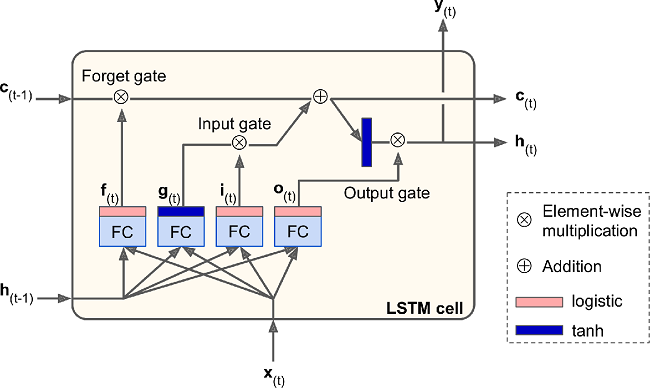
</p>
Figure 15-9. LSTM cell

Now let’s open the box!